In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
digits = datasets.load_digits()
features = digits.data
target = digits.target
standardizer = StandardScaler()
logit = LogisticRegression()

pipeline = make_pipeline(standardizer, logit)
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=kf,
                            scoring='accuracy', # loss function                            
                            n_jobs=-1) # use all cpu scores

cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [3]:
cv_results.mean()

0.9693916821849783

In [4]:
# baseline regression

from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

boston = load_boston()

features, target = boston.data, boston.target

features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

dummy = DummyRegressor(strategy='mean')

dummy.fit(features_train, target_train)

# get r-squared score
dummy.score(features_test, target_test)

-0.001119359203955339

In [5]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(features_train, target_train)

ols.score(features_test, target_test)

0.635463843320211

In [6]:
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

clf.score(features_test, target_test)

-0.06510502029325727

In [8]:
#baseline classifier
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier

iris = load_iris()
features, target = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    features, target, random_state=0)

dummy = DummyClassifier(strategy='uniform', random_state=1)

dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.42105263157894735

In [9]:
# compare randomforest to baseline
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

0.9736842105263158

In [10]:
# evaluating binary classifier predictions

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

#generate features metric and target vector
X, y = make_classification(n_samples=10000,
                          n_features=3,
                          n_informative=3,
                          n_redundant=0,
                          n_classes=2,
                          random_state=1)

logit = LogisticRegression()

cross_val_score(logit, X, y, scoring='accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [11]:
cross_val_score(logit, X, y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [13]:
cross_val_score(logit, X, y, scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

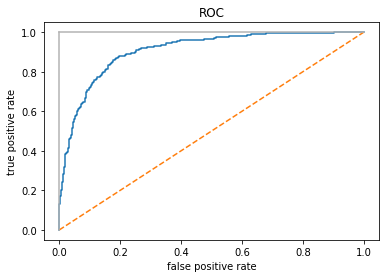

In [14]:
# evaluating binary classifier thresholds
# ROC-AUC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

features, target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_classes=2,
                                      n_informative=3,
                                      random_state=3)

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                   test_size=0.1, random_state=1)

logit = LogisticRegression()

logit.fit(X_train, y_train)

target_probas = logit.predict_proba(X_test)[:, 1]

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,
                                                              target_probas)

plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.7'), plt.plot([1,1,], c='.7')
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.show()

In [16]:
logit.predict_proba(X_test)[0:5]

array([[0.86891533, 0.13108467],
       [0.46315541, 0.53684459],
       [0.03395355, 0.96604645],
       [0.39609783, 0.60390217],
       [0.66670611, 0.33329389]])

In [17]:
logit.classes_

array([0, 1])

In [18]:
print('threshold', threshold[116])
print('tpr', true_positive_rate[116])
print('fpr', false_positive_rate[116])

threshold 0.5331715230155316
tpr 0.810204081632653
fpr 0.14901960784313725


In [20]:
roc_auc_score(y_test, target_probas)

0.9073389355742297

In [ ]:
# evaluating multiclass classifier

